Classification and Regression Trees (CART) are a set of supervised learning models used for problems involving classification and regression. In this chapter, you'll be introduced to the CART algorithm.

In [25]:
# Importing course packages; you can add more too!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Importing course datasets as DataFrames
auto = pd.read_csv('../datasets/auto.csv')
bikes = pd.read_csv('../datasets/bikes.csv')
liver_disease = pd.read_csv('../datasets/indian_liver_patient_preprocessed.csv', index_col=0)
wbc = pd.read_csv('../datasets/wbc.csv') # Wisconsin Breast Cancer Dataset

# Decision tree for classification

### Train your first classification tree

In this exercise you'll work with the Wisconsin Breast Cancer Dataset from the UCI machine learning repository. You'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (```radius_mean```) and its mean number of concave points (```concave points_mean```).

The dataset is already loaded in your workspace and is split into 80% train and 20% test. The feature matrices are assigned to X_train and ```X_test```, while the arrays of labels are assigned to ```y_train``` and ```y_test``` where class 1 corresponds to a malignant tumor and class 0 corresponds to a benign tumor. To obtain reproducible results, we also defined a variable called ```SEED``` which is set to 1.

[sklearn.tree.DecisionTreeClassifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [2]:
from sklearn.model_selection import train_test_split

SEED = 1
# map tumor diagnosis of Malignant to 1 and Beningn to 0.
wbc['diagnosis'] = wbc['diagnosis'].map({'M':1 ,'B':0})
# Create arrays for features and target variable
y = wbc['diagnosis'] # target
X = wbc[['radius_mean', 'concave points_mean']] # features
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [3]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 1 1 0 0]


### Evaluate the classification tree

Now that you've fit your first classification tree, it's time to evaluate its performance on the test set. You'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.

The trained model ```dt``` from the previous exercise is loaded in your workspace along with the test set features matrix ```X_test``` and the array of labels ```y_test```.

[sklearn.metrics.accuracy_score Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [4]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


### Logistic regression vs classification tree

A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

We have written a custom function called ```plot_labeled_decision_regions()``` that you can use to plot the decision regions of a list containing two trained classifiers. You can type ```help(plot_labeled_decision_regions)``` in the IPython shell to learn more about this function.

```X_train```, ```X_test```, ```y_train```, ```y_test```, the model ```dt``` that you've trained in an earlier exercise , as well as the function ```plot_labeled_decision_regions()``` are available in your workspace.

[sklearn.linear_model.LogisticRegression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[mlxtend.plotting.plot_decision_regions Documentation](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/)

[matplotlib.pyplot.subplots Documenation](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.subplots.html)

In [5]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install mlxtend

In [6]:
# Define function to display decision regions for each classifier.

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import itertools

def label_vis(xlab, ylab, title, yl):
    '''set labels and style of the plot.'''
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.ylim((0,yl))
    
def plot_labeled_decision_regions(features, target, clfs):
    """ function to build subplots with plot_decision_regions.
    Starting code taken from http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/"""
    gd_rows = 0
    gd_columns = 0
    fig_titles = [str(clf).split('(')[0] for clf in clfs]

    if len(clfs) == 1:
        plot_decision_regions(X=np.array(features), y=np.array(target), clf=clf, legend=2)
        label_vis(features.columns[0], features.columns[1], fig_titles[0], 0.2)
    else:
        gd_rows = len(clfs) // 2
        gd_columns = 2
        grid = gs.GridSpec(gd_rows, gd_columns)
        fig = plt.figure(figsize=(10,8))

        for clf, fig_title, rc in zip(clfs, fig_titles, itertools.product([0, 1], repeat=2)):
            row_ind = rc[0]
            col_ind = rc[1]
            ax = plt.subplot(grid[row_ind, col_ind])
            fig = plot_decision_regions(X=np.array(features), y=np.array(target), clf=clf, legend=2)
            label_vis(features.columns[0], features.columns[1], fig_title, 0.2)
            
    plt.show()


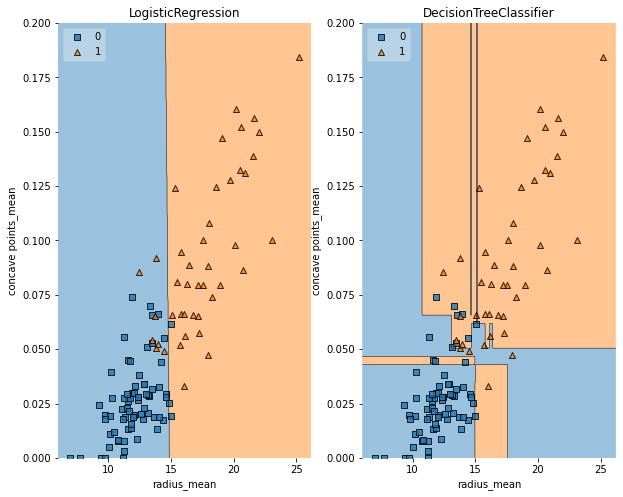

In [7]:
# DATACAMP SOLUTION

# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

# Classification tree Learning

### Using entropy as a criterion

In this exercise, you'll train a classification tree on the Wisconsin Breast Cancer dataset using entropy as an information criterion. You'll do so using all the 30 features in the dataset, which is split into 80% train and 20% test.

[sklearn.tree.DecisionTreeClassifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [8]:
# re instantiate the training/test data to include all 30 columns.
from sklearn.model_selection import train_test_split

# re-load the dataset fresh.
wbc = pd.read_csv('../datasets/wbc.csv') # Wisconsin Breast Cancer Dataset

# map tumor diagnosis of Malignant to 1 and Beningn to 0.
wbc['diagnosis'] = wbc['diagnosis'].map({'M':1 ,'B':0})
# Create arrays for features and target variable
y = wbc['diagnosis'] # target
X = wbc.drop(['diagnosis', 'id', 'Unnamed: 32'], axis='columns')
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [9]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

### Entropy vs Gini index

In this exercise you'll compare the test set accuracy of dt_entropy to the accuracy of another tree named dt_gini. The tree ```dt_gini``` was trained on the same dataset using the same parameters except for the information criterion which was set to the gini index using the keyword '```'gini'```.

```X_test```, ```y_test```, ```dt_entropy```, as well as``` accuracy_gini``` which corresponds to the test set accuracy achieved by ```dt_gini``` are available in your workspace.

In [10]:
# train and test test Decision Tree classifer using 'gini' as information criterion as mentioned in the scinario.

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred = dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred)


In [11]:
# Compare the accuracy of the gini index with entropy.

# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print(f'Accuracy achieved by using entropy: {accuracy_entropy:.3f}')

# Print accuracy_gini
print(f'Accuracy achieved by using the gini index: {accuracy_gini:.3f}')

Accuracy achieved by using entropy: 0.956
Accuracy achieved by using the gini index: 0.939


# Decision tree for regression

### Train your first regression tree

In this exercise, you'll train a regression tree to predict the mpg (miles per gallon) consumption of cars in the auto-mpg dataset using all the six available features.

The dataset is processed for you and is split to 80% train and 20% test. The features matrix ```X_train``` and the array ```y_train``` are available in your workspace.

[pandas.get_dummies Documentation](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

[sklearn.tree.DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [28]:
# prep the data for training.
from sklearn.model_selection import train_test_split
import pandas as pd

# prep data creating dummy variables.
# Create dummy variables for categorical columns with drop_first=True: auto_origin
auto_origin = pd.get_dummies(auto, drop_first=True)

# Create arrays for features and target variable
y = auto_origin['mpg'] # target
X = auto_origin.drop('mpg', axis='columns') # features

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [29]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
                           min_samples_leaf=0.13,
                           random_state=3
                           )

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

### Evaluate the regression tree

In this exercise, you will evaluate the test set performance of ```dt``` using the Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).

The features matrix ```X_test```, the array ```y_test```, as well as the decision tree regressor ```dt``` that you trained in the previous exercise are available in your workspace.

[sklearn.metrics.mean_squared_error Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

In [30]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.82


### Linear regression vs regression tree

In this exercise, you'll compare the test set RMSE of ```dt``` to that achieved by a linear regression model. We have already instantiated a linear regression model lr and trained it on the same dataset as ```dt```.

The features matrix ```X_test```, the array of labels ```y_test```, the trained linear regression model ```lr```, ```mean_squared_error``` function which was imported under the alias ```MSE``` and ```rmse_dt``` from the previous exercise are available in your workspace.

In [32]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
lr = LinearRegression()

# Fit the model to the data
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predict test set labels 
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 4.30
Regression Tree test set RMSE: 4.82
